<a href="https://colab.research.google.com/github/juhi2021/juhi2021.github.io/blob/projs/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import preprocessing
from collections import Counter

#copy the share link and give access to link and remove the part after .com/ till the id 
#and add 'uc?export=download&id=' instead and remove '/view?usp=sharing'
train_path = r'https://drive.google.com/uc?export=download&id=1Ap1nZF_BZ94ycMyQhxPN7Pf8nl9LRJ7D'
test_path = r'https://drive.google.com/uc?export=download&id=1Ibp2AJDuqBxZISoEClhzl7h__5-yOfuH'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.shape, test_df.shape

((891, 12), (418, 11))

In [ ]:
# Outlier detection 
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_df,2,["Age","SibSp","Parch","Fare"])

# Show the outliers rows
print(train_df.loc[Outliers_to_drop])

# Drop outliers
#train_df = train_df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# after removing outlier, let's re-concat the data sets
#dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

     PassengerId  Survived  Pclass  ...    Fare        Cabin  Embarked
27            28         0       1  ...  263.00  C23 C25 C27         S
88            89         1       1  ...  263.00  C23 C25 C27         S
159          160         0       3  ...   69.55          NaN         S
180          181         0       3  ...   69.55          NaN         S
201          202         0       3  ...   69.55          NaN         S
324          325         0       3  ...   69.55          NaN         S
341          342         1       1  ...  263.00  C23 C25 C27         S
792          793         0       3  ...   69.55          NaN         S
846          847         0       3  ...   69.55          NaN         S
863          864         0       3  ...   69.55          NaN         S

[10 rows x 12 columns]


In [ ]:
#select the target
y = train_df.Survived

#concatenate both datasets
df = pd.concat((train_df, test_df))
temp_df = df

#set the index for the concatenated dataset
df = df.set_index("PassengerId")
train_df_len = len(train_df)
train_df = df
train_df.shape
y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1308,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braundd, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


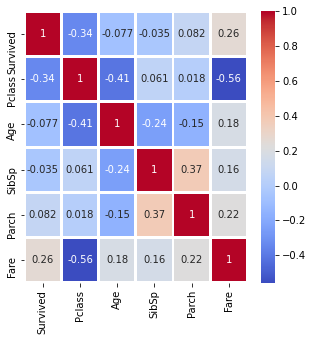

In [ ]:
## Lets Find the realtionship between them and Survived
plt.figure(figsize=(5,5))
sns.heatmap(train_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

Number of Train numerical variables:  ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
discrete ['Survived', 'SibSp', 'Parch']


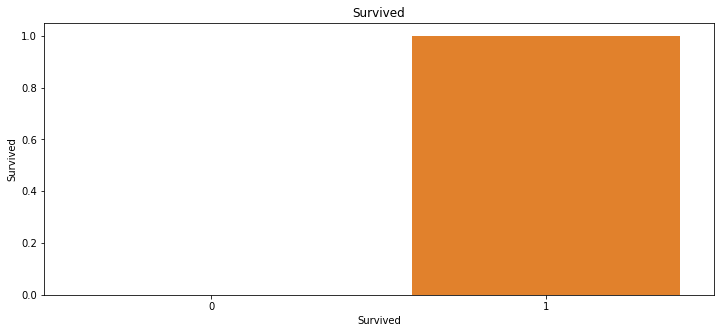

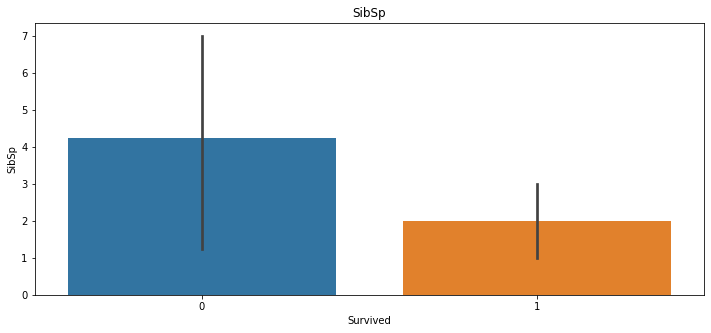

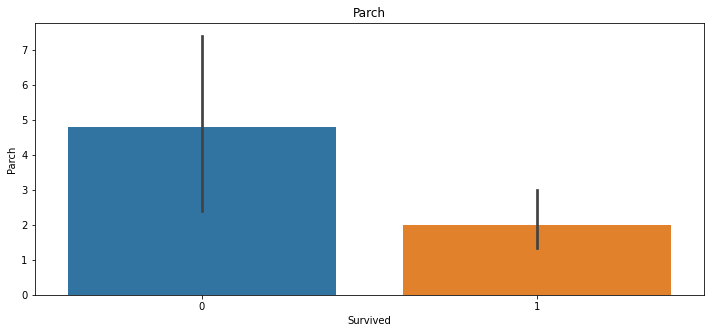

In [ ]:
# change num columns to str columns
cat_feat_num_to_str = ['Pclass']
for i in cat_feat_num_to_str:
  train_df[i] = train_df[i].astype(str)

# list of numerical variables
numeric_features_train = [features for features in train_df.columns if train_df[features].dtype !='O']
print('Number of Train numerical variables: ', numeric_features_train)

discrete_var_train = [features for features in numeric_features_train if len(train_df[features].unique())<25]
print('discrete', discrete_var_train)

## Lets Find the realtionship between them and Survived
for feature in discrete_var_train:
    #print(feature)
    data=train_df.copy()
    plt.figure(figsize=(12,5))
    sns.barplot(data=data.groupby(feature).sum().reset_index(),x=y,y=feature)
    plt.title(feature)
    plt.show()

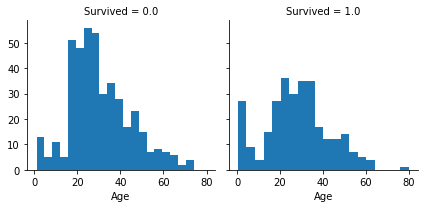

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


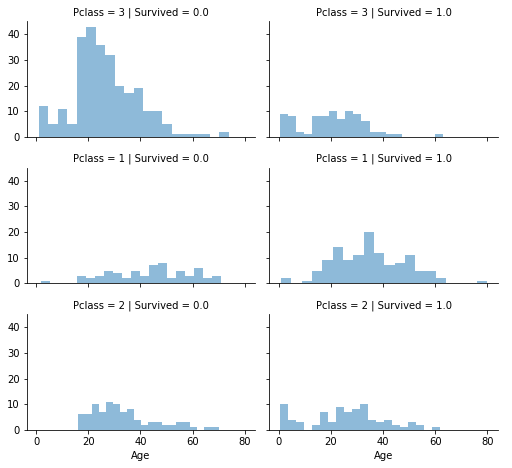

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
#grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
#grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
#grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


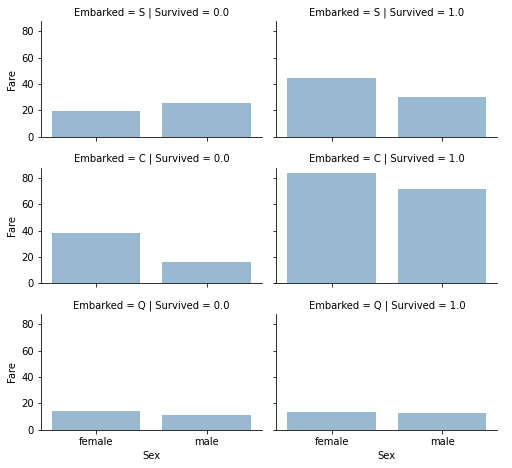

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

['Age', 'Fare']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

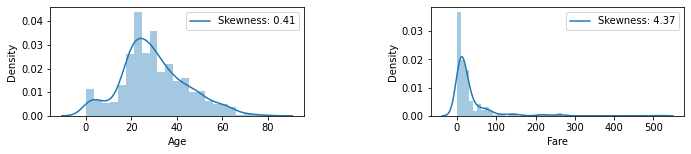

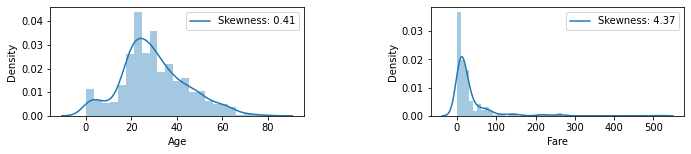

In [ ]:
continuous_feature_train=[feature for feature in numeric_features_train if feature not in discrete_var_train]
print(continuous_feature_train)

plt.figure(figsize=(25,20))
for i in range(len(continuous_feature_train)):
  if i <= 10:
    plt.subplot(7,4,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    #sns.displot(data=df[skewed_feat[i]], height=5)
    #sns.displot(data=df[skewed_feat[i]])
    ax = sns.distplot(train_df[continuous_feature_train[i]])
    ax.legend(["Skewness: {:.2f}".format(train_df[continuous_feature_train[i]].skew(), fontsize='xx-large')])
    #plt.show()

#log reduction of skewness
#for i in continuous_feature_train:
  #train_df[i]=np.log1p(train_df[i])
  #train_df[i] = np.log(train_df[i]+1)

plt.figure(figsize=(25,20))
for i in range(len(continuous_feature_train)):
  if i <= 10:
    plt.subplot(7,4,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = sns.distplot(train_df[continuous_feature_train[i]])
    ax.legend(["Skewness: {:.2f}".format(train_df[continuous_feature_train[i]].skew(), fontsize='xx-large')])

In [ ]:
null_percent = train_df.isnull().sum()/train_df.shape[0]*100
col_for_drop = null_percent[null_percent>15].keys()

#train_df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
train_df['Has_Cabin'] = train_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1 )
train_df.drop('Cabin', axis=1, inplace=True)

## Calculating fare based on family size. 
train_df['family_size'] = train_df['Parch'] + train_df['SibSp']
train_df['calculated_fare'] = train_df.Fare/train_df.family_size

def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train_df['fare_group'] = train_df['calculated_fare'].map(fare_group)
train_df.drop(['calculated_fare', 'family_size'], axis=1, inplace=True)
#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

#df of all the columns having null value in any one column
df_with_na = train_df[train_df.isnull().any(axis=1)]
#print(df_with_na)
df_with_na['Age'].fillna(
    value=np.random.randint(train_df['Age'].mean() - train_df['Age'].std(), train_df['Age'].mean() + train_df['Age'].std()), 
    inplace=True)
df_with_na['Embarked'].fillna(value=train_df['Embarked'].mode()[0], inplace=True)
df_with_na['Fare'].fillna(df_with_na['Fare'].dropna().median(), inplace=True)
df_with_na
train_df.update(df_with_na)
train_df.head(6)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,fare_group
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braundd, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,0.0,low
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0,very_high
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,0.0,very_high
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0,very_high
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0,very_high
6,0.0,3,"Moran, Mr. James",male,21.0,0.0,0.0,330877,8.4583,Q,0.0,very_high


In [ ]:
train_df['Title1'] = train_df['Name'].str.split(", ", expand=True)[1]
train_df.drop('Name', axis=1, inplace=True)
train_df['Title1'] = train_df['Title1'].str.split(".", expand=True)[0]
train_df['Title1'] = train_df['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
train_df['Title1'].unique()
#train_df = pd.get_dummies(train_df, columns=['Title1'])
#train_df['Words_Count'] = data['Name'].apply(lambda x: len(x.split()))
#train_df.drop('Words_Count', axis=1, inplace=True)

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
train_df['Ticket_type'] = train_df['Ticket'].apply(lambda x: x[0:3])
train_df['Ticket_type'] = train_df['Ticket_type'].astype('category')
train_df['Ticket_type'] = train_df['Ticket_type'].cat.codes 
train_df.drop('Ticket', axis=1, inplace=True)
train_df['Ticket_type'].unique()
train_df.drop('Ticket_type', axis=1, inplace=True)

In [ ]:
#train_df['Single'] = 0

#for i in range(train_df.shape[0]):
#  if train_df['Parch'][i+1]+train_df['SibSp'][i+1] >= 1:
#    train_df.loc[i+1, 'Single'] = 0
#  else:
#    train_df.loc[i+1, 'Single'] = 1
#    
#train_df.drop(['SibSp', 'Parch'], inplace=True, axis=1)
train_df['Single'] = train_df['Parch'] + train_df['SibSp']
train_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)
train_df['Single'] = train_df['Single'].apply(lambda x: 0 if x >= 1   else  1)
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,fare_group,Title1,Single
PassengerId,,,,,,,,,,
1,0.0,3,male,22.0,7.2500,S,0.0,low,Mr,0
2,1.0,1,female,38.0,71.2833,C,1.0,very_high,Mrs,0
3,1.0,3,female,26.0,7.9250,S,0.0,very_high,Miss,1


In [ ]:
feature_with_na = [features for features in train_df.columns if train_df[features].isnull().sum()>1]
print(feature_with_na)

['Survived']


In [ ]:
# list of categorical variables
cat_features_train = [features for features in train_df.columns if train_df[features].dtype == 'O']
print('Number of Train object variables: ', cat_features_train)

#Applying label encoding
def label_encoding(dataset,columns):
    label_encoder = preprocessing.LabelEncoder()
    for i in columns:
        dataset[i]=label_encoder.fit_transform(dataset[i])
    return dataset

column_to_label_encode = ['Sex', 'Embarked', 'fare_group', 'Title1']
train_df_data = train_df.copy()#[['PassengerId', 'Pclass', 'Sex', 'Fare']]
train_df_final = label_encoding(train_df_data, column_to_label_encode)
train_df_final.head()
train_df.update(train_df_final)



Number of Train object variables:  ['Pclass', 'Sex', 'Embarked', 'fare_group', 'Title1']


In [ ]:
train_df.Survived.unique()

array([ 0.,  1., nan])

In [ ]:
train_df[['Pclass', 'Sex', 'Embarked', 'Has_Cabin', 'fare_group', 'Title1']] = train_df[['Pclass', 'Sex', 'Embarked', 'Has_Cabin', 'fare_group', 'Title1']].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   int64  
 3   Age         1309 non-null   float64
 4   Fare        1309 non-null   float64
 5   Embarked    1309 non-null   int64  
 6   Has_Cabin   1309 non-null   int64  
 7   fare_group  1309 non-null   int64  
 8   Title1      1309 non-null   int64  
 9   Single      1309 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 112.5 KB


In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

for i in range(0, 2):
    for j in range(0, 3):
        
        guess_df = train_df[(train_df['Sex'] == i) & (train_df['Pclass'] == j+1)]['Age'].dropna()
        
        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        age_guess = guess_df.median()
        
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
print(guess_ages)
for i in range(0, 2):
    for j in range(0, 3):
        train_df.loc[ (train_df.Age.isnull()) &  (train_df.Sex == i) & (train_df.Pclass == j+1), 'Age'] = guess_ages[i,j]

train_df['Age'] = train_df['Age'].astype(int)

train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

train_df.head()

[[35. 27. 21.]
 [37. 28. 21.]]


,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,fare_group,Title1,Single,AgeBand
PassengerId,,,,,,,,,,,
1,0.0,3,1,22,7.2500,2,0,2,2,0,"(16.0, 32.0]"
2,1.0,1,0,38,71.2833,0,1,4,3,0,"(32.0, 48.0]"
3,1.0,3,0,26,7.9250,2,0,4,1,1,"(16.0, 32.0]"
4,1.0,1,0,35,53.1000,2,1,4,3,0,"(32.0, 48.0]"
5,0.0,3,1,35,8.0500,2,0,4,2,1,"(32.0, 48.0]"


In [ ]:
train_not_null_df = train_df[(train_df['Survived'].notnull())][['AgeBand', 'Survived']]

train_not_null_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,fare_group,Title1,Single,AgeBand
PassengerId,,,,,,,,,,,
1,0.0,3,1,1,7.2500,2,0,2,2,0,"(16.0, 32.0]"
2,1.0,1,0,2,71.2833,0,1,4,3,0,"(32.0, 48.0]"
3,1.0,3,0,1,7.9250,2,0,4,1,1,"(16.0, 32.0]"
4,1.0,1,0,2,53.1000,2,1,4,3,0,"(32.0, 48.0]"
5,0.0,3,1,2,8.0500,2,0,4,2,1,"(32.0, 48.0]"


In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_not_null_df = train_df[(train_df['Survived'].notnull())][['FareBand', 'Survived']]

train_not_null_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3

train_df['Fare'] = train_df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
train_df = train_df.drop(['Fare'], axis=1)

In [ ]:
# Tried using OneHotEncoder but it creates columns for each values
#cat_features_train = cat_features_train.remove('Pclass')
object_cols = ['Sex', 'Embarked', 'Pclass', 'fare_group', 'Title1', 'Age']#no one hot encoding
df_other = train_df[object_cols]

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_other))

# One-hot encoding removed index; put it back
OH_cols.index = df_other.index
OH_cols.columns = OH_encoder.get_feature_names()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_df.drop(object_cols, axis=1)

#OH_cols_train = pd.DataFrame(X, columns = ["Country_"+str(int(i)) for i in range(data.shape[1])]) 

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols], axis=1)
OH_cols = OH_cols.astype(int)

train_df = OH_X_train
train_df.head()

,Survived,Has_Cabin,Single,x0_0,x0_1,x1_0,x1_1,x1_2,x2_1,x2_2,x2_3,x3_0,x3_1,x3_2,x3_3,x3_4,x4_0,x4_1,x4_2,x4_3,x5_0,x5_1,x5_2,x5_3,x5_65,x5_66,x5_67,x5_70,x5_71,x5_74,x5_76,x5_80
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Has_Cabin  1309 non-null   int64  
 2   Single     1309 non-null   int64  
 3   x0_0       1309 non-null   float64
 4   x0_1       1309 non-null   float64
 5   x1_0       1309 non-null   float64
 6   x1_1       1309 non-null   float64
 7   x1_2       1309 non-null   float64
 8   x2_1       1309 non-null   float64
 9   x2_2       1309 non-null   float64
 10  x2_3       1309 non-null   float64
 11  x3_0       1309 non-null   float64
 12  x3_1       1309 non-null   float64
 13  x3_2       1309 non-null   float64
 14  x3_3       1309 non-null   float64
 15  x3_4       1309 non-null   float64
 16  x4_0       1309 non-null   float64
 17  x4_1       1309 non-null   float64
 18  x4_2       1309 non-null   float64
 19  x4_3       1309 non-null   float64
 20  x5_0    

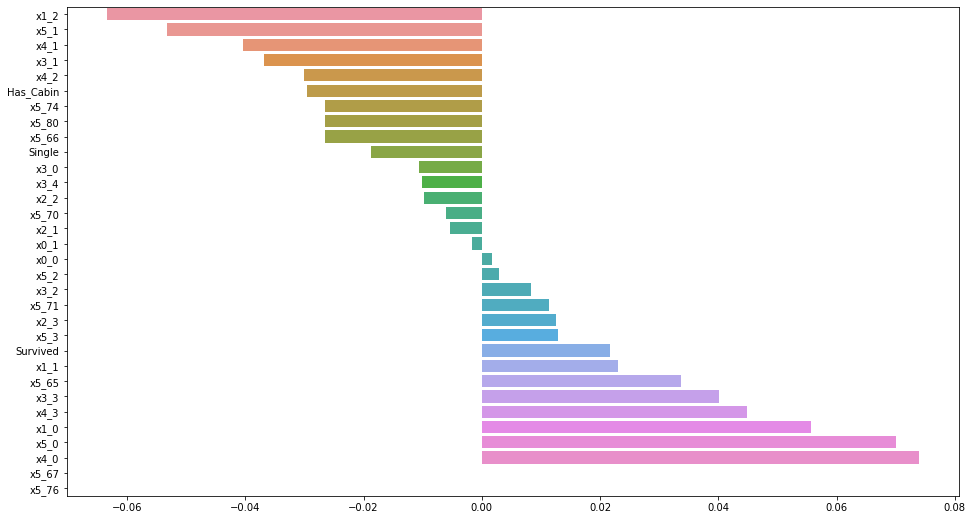

In [ ]:
plt.figure(figsize=(16,9))
corr_feat_series = pd.Series.sort_values(train_df.corrwith(y))
sns.barplot(x=corr_feat_series, y= corr_feat_series.index, orient='h')

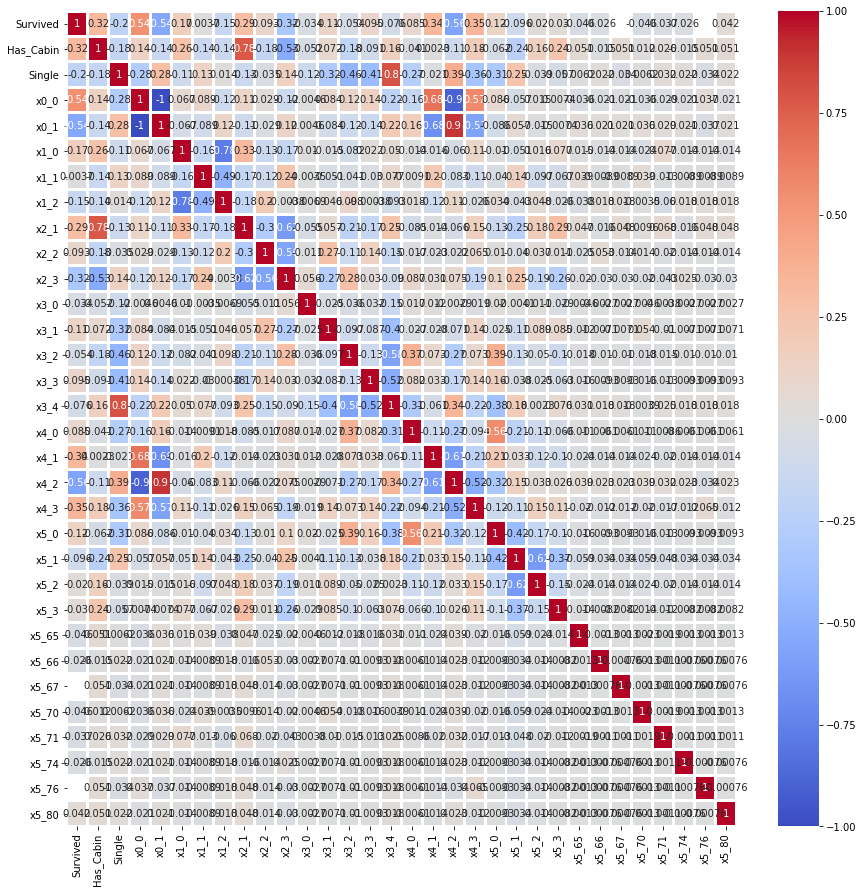

In [ ]:
## Lets Find the realtionship between them and Sale PRice
plt.figure(figsize=(15,15))
sns.heatmap(train_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [ ]:
#train_df.drop('Fare', axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Has_Cabin  1309 non-null   int64  
 2   Single     1309 non-null   int64  
 3   x0_0       1309 non-null   float64
 4   x0_1       1309 non-null   float64
 5   x1_0       1309 non-null   float64
 6   x1_1       1309 non-null   float64
 7   x1_2       1309 non-null   float64
 8   x2_1       1309 non-null   float64
 9   x2_2       1309 non-null   float64
 10  x2_3       1309 non-null   float64
 11  x3_0       1309 non-null   float64
 12  x3_1       1309 non-null   float64
 13  x3_2       1309 non-null   float64
 14  x3_3       1309 non-null   float64
 15  x3_4       1309 non-null   float64
 16  x4_0       1309 non-null   float64
 17  x4_1       1309 non-null   float64
 18  x4_2       1309 non-null   float64
 19  x4_3       1309 non-null   float64
 20  x5_0    

In [ ]:
#split the dataset back into train and test dataset
X = train_df[:train_df_len].sort_values(by='PassengerId', ascending=True)
#X.sort_values(by='PassengerId', ascending=True, inplace=True)
X['Survived'] = X['Survived'].astype(int)
y = X['Survived']
X.drop(['Survived'], axis=1, inplace=True)

X_pred = train_df[train_df_len:].sort_values(by='PassengerId', ascending=True)
X_pred.drop(['Survived'], axis=1, inplace=True)
#X_pred.sort_values(by='PassengerId', ascending=True, inplace=True)

#X = pd.DataFrame(full_data_arr[:train_df_len])
#X.columns = train_df.columns
#X_pred = pd.DataFrame(full_data_arr[train_df_len:])

#X_train = X_train.drop(['SalePrice'], axis=1)
print(X.shape, X_pred.shape)

# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)
y.tail()

(891, 31) (418, 31)


PassengerId
887    0
888    1
889    0
890    1
891    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import BaggingClassifier


In [ ]:
# calculate RMSE metric:
def cv_rmse(model, X_train, y_train):
  # 10 Fold Cross validation
  cv = KFold(n_splits=5, random_state=42, shuffle=True) 
  rmse =np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_log_error", cv=cv))
  #print({'mod_mean': rmse.mean(), 'mod_std': rmse.std()})
  #return ({'mod_mean': rmse.mean(), 'mod_std': rmse.std()})
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  rmsle = 0#np.sqrt(mean_squared_log_error(y_test, y_pred))
  #print('RMLSE : %f' % rmsle)
  #pred_score = best_estimator.score(X_train, y_train))
  #print('score is ', round(best_estimator.score(X_train, y_train) * 100, 2))
  #return ({'mod_mean': rmse.mean(), 'mod_score': model.score(X_train, y_train), 'acc':acc})
  return ({'mod_mean': 0, 'mod_score': 0, 'acc':acc})


score=[]

def model_check():
  score_cv_all = []

  # K – Nearest Neighbor Classifier
  knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  score_cv = cv_rmse(knn_classifier, X_train, y_train)
  score_cv_all.append(score_cv)

  # Logistic Regression
  lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2', max_iter=500)
  score_cv = cv_rmse(lr_classifier, X_train, y_train)
  score_cv_all.append(score_cv)

  # Support vector classifier
  svc_classifier = SVC(probability=True)
  score_cv = cv_rmse(svc_classifier, X_train, y_train)
  score_cv_all.append(score_cv)

  # Naive Bayes Classifier
  nb_classifier = GaussianNB()
  score_cv_all.append(cv_rmse(nb_classifier, X_train, y_train))

  # Decision Tree Classifier
  dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
  score_cv_all.append(cv_rmse(dt_classifier, X_train, y_train))

  # Random Forest Classifier
  rf_classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 51)
  score_cv_all.append(cv_rmse(rf_classifier, X_train, y_train))

  # Adaboost Classifier
  adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1)
  score_cv_all.append(cv_rmse(adb_classifier, X_train, y_train))

  # XGBoost Classifier
  xgb_classifier = XGBClassifier()
  score_cv_all.append(cv_rmse(xgb_classifier, X_train, y_train))

  # GradBoost Classifier
  grad_classifier = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,
                                     min_samples_split=5,n_estimators=1000,verbose=False)
  score_cv_all.append(cv_rmse(grad_classifier, X_train, y_train))

  # CatBoost Classifier
  #cat_classifier = CatBoostClassifier()
  #score_cv_all.append(cv_rmse(cat_classifier, X_train, y_train))

  baseline_models = ['Logistic', 'KNN', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Adaboost', 'XGB', 'Grad Boost']

  final_cv_score = pd.DataFrame(baseline_models, columns = ['Classifiers'])
  final_cv_score['RMSLE_mean'] = 0
  final_cv_score['Score'] = 0
  final_cv_score['Accuracy'] = 0

  for i in range(len(score_cv_all)):
    #print(score_cv_all[i]['mod_mean'])
    final_cv_score.loc[i, 'RMSLE_mean'] = score_cv_all[i]['mod_mean']
    final_cv_score.loc[i, 'Score'] = score_cv_all[i]['mod_score']
    final_cv_score.loc[i, 'Accuracy'] = score_cv_all[i]['acc']
    
  return (final_cv_score)

score_overall = model_check()

score_overall.sort_values(by='Accuracy', ascending=True)

,Classifiers,RMSLE_mean,Score,Accuracy
3,Naive Bayes,0,0,0.385475
4,Decision Tree,0,0,0.826816
6,Adaboost,0,0,0.832402
0,Logistic,0,0,0.837989
5,Random Forest,0,0,0.837989
7,XGB,0,0,0.837989
8,Grad Boost,0,0,0.837989
1,KNN,0,0,0.843575
2,SVC,0,0,0.843575


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

def get_best_estimator(model, params, X_train=X_train, y_train=y_train):
  cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
  rand_search = RandomizedSearchCV(model, param_distributions=params, n_jobs=1, cv=cv)
  rand_search.fit(X_train, y_train)
  print(rand_search.best_score_)#, rand_search.best_estimator_)
  print("rmse estimator",cv_rmse(rand_search.best_estimator_, X_train, y_train))
  return (rand_search.best_estimator_)

In [ ]:
# XGBoost classifier most required parameters
xgb_params = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}
#xgb_reg_best = get_best_estimator(XGBClassifier(), xgb_params)

# AdaBoost classifier most required parameters
adb_params = {
 "learning_rate"    : [0.05, 0.10, 0.15 ],
 "algorithm"        : ['SAMME.R'],
 'n_estimators'     : [1000, 2000],
 "random_state"     : [100]
}
adb_params = {}
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1)
#adb_classifier.fit(X_train, y_train)
#print(adb_classifier.score(X_train, y_train))
#adb_reg_best = get_best_estimator(adb_classifier, adb_params)

# DT classifier most required parameters
dt_params = {
 "criterion"        : ['entropy', 'gini'],
 "splitter"         : ['best', 'random'],
 "max_depth"        : [ 2, 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_split" : [ 2, 3, 4, 5, 7 ],
 "min_samples_leaf" : [ 1, 2, 3, 4, 5, 7 ],
 "max_features"     : ['auto'],
 
}
#dt_classifier_best = get_best_estimator(DecisionTreeClassifier(), dt_params)

# SV classifier most required parameters
svc_params = {
 "C"        : [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10],
 "gamma"         : [0.0001,0.001, 0.01, 0.1, 1],
}
#svc_classifier_best = get_best_estimator(SVC(kernel = 'rbf', probability=True), svc_params)
#grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
#grid_search.fit(X,y)

# K – Nearest Neighbor Classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
grad_classifier = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,
                                     min_samples_split=5,n_estimators=1000,verbose=False)
xgb_classifier = XGBClassifier()
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2', max_iter=500)
svc_classifier = SVC(kernel = 'rbf', probability=True)
bag_classifier = BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False)
best_estimator = xgb_classifier

In [ ]:
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
y_pred
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print('RMLSE : %f' % rmsle)
print('score is ', round(best_estimator.score(X_train, y_train) * 100, 2))
print('score is ', round(accuracy_score(y_test, y_pred) * 100, 2))

RMLSE : 0.293072
score is  86.38
score is  82.12


In [ ]:
feature_importance = best_estimator.feature_importances_
df_fi = pd.DataFrame({'feature':X_train.columns,'weight':feature_importance*100})
df_fi.sort_values(by='weight',ascending=False)

AttributeError: ignored

In [ ]:
fi_cols = df_fi.loc[df_fi['weight']>=1]['feature'].to_numpy()
fi_cols

array(['Has_Cabin', 'x1_0', 'x1_1', 'x1_2', 'x2_1', 'x2_3', 'x3_2',
       'x3_3', 'x4_2', 'x5_2'], dtype=object)

In [ ]:
best_estimator.fit(X_train[fi_cols], y_train)
y_pred = best_estimator.predict(X_test[fi_cols])
#rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
#print('RMLSE: %f' % rmsle)
#print('score is ', round(best_estimator.score(X_train, y_train) * 100, 2))
print('score is ', round(accuracy_score(y_test, y_pred) * 100, 2))

score is  84.36


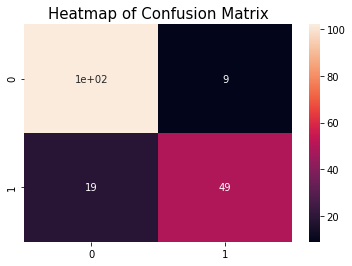

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.72      0.78        68

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



In [ ]:
#y = X_train['Survived']
#X = X_train.drop('Survived', axis=1)
best_estimator.fit(X, y)
y_pred = best_estimator.predict(X_pred)#[fi_cols])

best_estimator.fit(X[fi_cols], y)
y_pred = best_estimator.predict(X_pred[fi_cols])

#best_estimator.fit(X, y)
#y_pred = best_estimator.predict(X_pred)#np.exp(grad_boo_reg_best.predict(X_pred)).round(2)
y_pred

submit_test = pd.concat([test_df['PassengerId'], pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['PassengerId', 'Survived']
submit_test.to_csv("sample_submission.csv", index=False)
submit_test['Survived']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [ ]:
compare_datatypes = pd.DataFrame({'TrainDataType':train_df.dtypes,'TestDataType':test_df.dtypes}).reset_index()

compare_datatypes['TrainDataType'] = compare_datatypes['TrainDataType'].astype('str')
compare_datatypes['TestDataType'] = compare_datatypes['TestDataType'].astype('str')
compare_datatypes.head()

datatype_cnvt_col =[]
for i,j,k in zip(compare_datatypes['TrainDataType'],compare_datatypes['TestDataType'],compare_datatypes['index']):
    if i!=j and k not in ['Survived']:
        datatype_cnvt_col.append(k)
        print(i,j,k)
        
def float_to_int(dataset,columns):
    dataset[columns] = dataset[columns].astype('Int64')
    return dataset

train_df = float_to_int(train_df, datatype_cnvt_col)
train_df.head()

# list of numerical variables
numeric_features_train = [features for features in train_df.columns if train_df[features].dtype !='O']
print('Number of Train numerical variables: ', numeric_features_train)

discrete_var_train = [features for features in numeric_features_train if len(train_df[features].unique())<25]
print('discrete', discrete_var_train)

## Lets Find the realtionship between them and Survived
for feature in discrete_var_train:
    print(feature)
    data=train_df.copy()
    plt.figure(figsize=(12,5))
    sns.barplot(data=data.groupby(feature).sum().reset_index(),x=feature,y='Survived')
    plt.title(feature)
    plt.show()

continuous_feature_train=[feature for feature in numeric_features_train if feature not in discrete_var_train]
continuous_feature_train

## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature_train:
    data=train_df.copy()
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.distplot(data[feature],bins=25,hist_kws=dict(edgecolor="green", linewidth=1))
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    #data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## We will be using logarithmic transformation
for feature in continuous_feature_train:
    data=train_df.copy()
    plt.figure(figsize=(10,5))
    data[feature]=np.log1p(data[feature])
    sns.regplot(data[feature],data['Survived'],x_jitter=True,y_jitter=True)
    #plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Survived')
    plt.title(feature)
    plt.show()

#Find outliers
for feature in continuous_feature_train:
    data=train_df.copy()
    plt.figure(figsize=(10,5))
    data[feature]=np.log1p(data[feature])
    sns.boxplot(data = data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

def replace_outliers(dataset, columns):
    
    for feature in columns:
        # calculate interquartile range
        q25, q75 = np.percentile(dataset[feature],25) , np.percentile(dataset[feature],75)
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        median = dataset[feature].median()
        # replace outlier with upper limit value
        dataset[feature] = dataset[feature].apply(lambda x: upper if x > upper else(lower if x<lower else x))

replace_outliers(train_df, continuous_feature_train)
for feature in continuous_feature_train:
    data=train_df.copy()
    plt.figure(figsize=(10,5))
    #data[feature]=np.log1p(data[feature])
    sns.boxplot(data = data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#Numerical Variables
#Since the numerical variables are skewed we are converting skewed distribution to log normal distribution
def convert_to_lognormal_distribution(dataset, cont_features):
    for feature in cont_features:
        dataset[feature]=np.log1p(dataset[feature])
    return dataset

nan float64 Age
nan object Cabin
nan object Embarked
nan float64 Fare
int64 nan Has_Cabin
nan object Name
nan int64 Parch
nan int64 PassengerId
nan int64 Pclass
nan object Sex
nan int64 SibSp
int64 nan Single
nan object Ticket
float64 nan x0_0
float64 nan x0_1
float64 nan x1_0
float64 nan x1_1
float64 nan x1_2
float64 nan x2_1
float64 nan x2_2
float64 nan x2_3
float64 nan x3_0
float64 nan x3_1
float64 nan x3_2
float64 nan x3_3
float64 nan x3_4
float64 nan x4_0
float64 nan x4_1
float64 nan x4_2
float64 nan x4_3
float64 nan x5_0
float64 nan x5_1
float64 nan x5_2
float64 nan x5_3
float64 nan x5_65
float64 nan x5_66
float64 nan x5_67
float64 nan x5_70
float64 nan x5_71
float64 nan x5_74
float64 nan x5_76
float64 nan x5_80


KeyError: ignored